# Notebook that generates example data.

## Generate Data

In [1]:
from gpmap.simulate import MountFujiSimulation
from epistasis.stats import split_gpm
import pandas as pd

# Generate a dataset.
gpm = MountFujiSimulation.from_length(5, roughness_width=0.5)

### Write output

In [2]:

def write_pretty_csv(gpm,csv_name):
    
    df = pd.DataFrame({"genotypes":gpm.data["genotypes"],
                       "phenotypes":gpm.data["phenotypes"]})
    df.to_csv(csv_name,index=False)


# Split dataset
train, test = split_gpm(gpm, fraction=0.5)

# write csv files
write_pretty_csv(gpm,'example-full.csv')
write_pretty_csv(train,'example-train.csv')
write_pretty_csv(test,'example-test.csv')

## Visualize+fit the data.

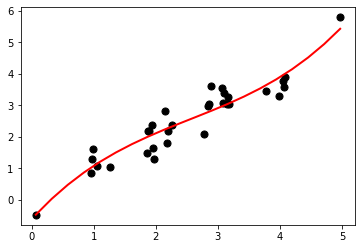

In [3]:
import matplotlib.pyplot as plt
from epistasis.pyplot.nonlinear import plot_scale
from epistasis.models import EpistasisPipeline, EpistasisSpline, EpistasisLinearRegression

# Fit a model.
m = EpistasisPipeline([
    EpistasisSpline(k=3),
    EpistasisLinearRegression(order=2)
])
m.add_gpm(gpm)
m.fit()
m.score()

plot_scale(m[0])